# Laptop Price Predictor
Overview : We have acquired a dataset for laptop with their prices, our goal is to explore the dataset and build a model to predict the laptop prices.

Notes : 
<li>Try log transform on price
<li>Remove clock speed and see if model performs better

## Importing libraries

In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error

import pickle

## Importing dataset

In [2]:
df = pd.read_csv('../Datasets/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Initial thoughts:
<li>Unnamed : 0 column has to be removed
<li>OpSys should be heavily correleated with the company
<li>Rest of the features seem important

In [3]:
df.shape

(1303, 12)

We have limited data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


There is no missing data

In [5]:
df.duplicated().sum()

0

There is no duplicate values

In [6]:
df.drop(columns=['Unnamed: 0'], inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df['Ram'] = df['Ram'].apply(lambda row : row.split("GB")[0])
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].apply(lambda row : row.split("kg")[0])
df['Weight'] = df['Weight'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


## EDA

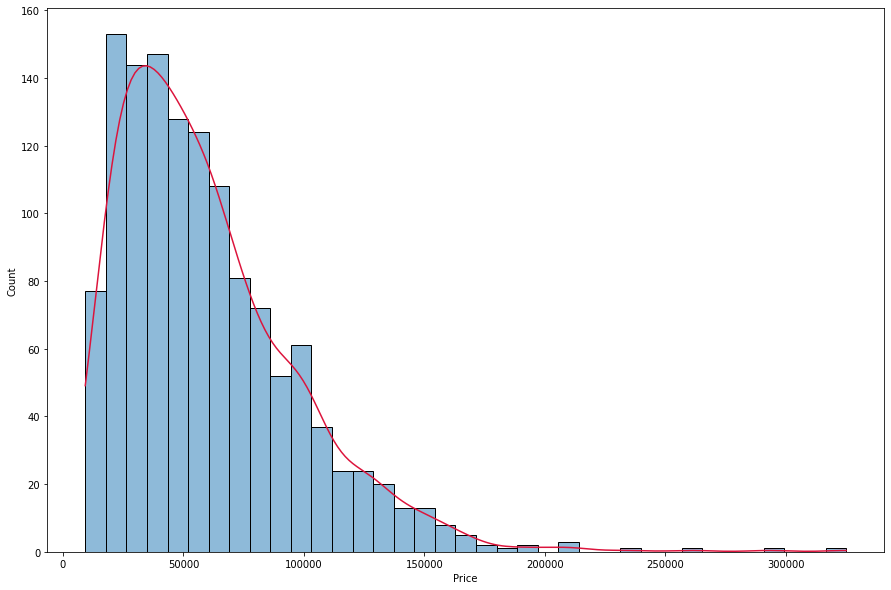

In [10]:
plt.figure(figsize = (15,10))
ax = sns.histplot(data = df, x = 'Price', kde = True, stat = 'count')
ax.lines[0].set_color('crimson')
plt.show()

Our data is right skewed

In [11]:
price_df = pd.DataFrame()
price_df['Price_sqrt'] = df['Price'].apply(lambda row : np.sqrt(row))
price_df['Price_cbrt'] = df['Price'].apply(lambda row : np.cbrt(row))
price_df['Price_log'] = df['Price'].apply(lambda row : np.log(row))

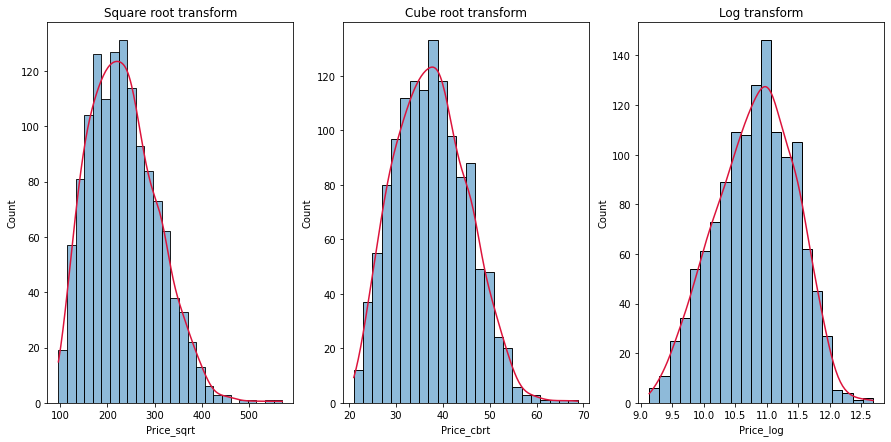

In [12]:
fig, ax = plt.subplots(1,3, figsize = (15, 7))
sns.histplot(data = price_df, x = 'Price_sqrt', kde = True, stat = 'count', ax = ax[0])
ax[0].lines[0].set_color('crimson')
ax[0].title.set_text('Square root transform')
sns.histplot(data = price_df, x = 'Price_cbrt', kde = True, stat = 'count', ax = ax[1])
ax[1].lines[0].set_color('crimson')
ax[1].title.set_text('Cube root transform')
sns.histplot(data = price_df, x = 'Price_log', kde = True, stat = 'count', ax = ax[2])
ax[2].lines[0].set_color('crimson')
ax[2].title.set_text('Log transform')

In [13]:
price_df.describe()

,Price_sqrt,Price_cbrt,Price_log
count,1303.000000,1303.000000,1303.000000
mean,233.909942,37.570597,10.814734
std,71.834130,7.710763,0.623841
min,96.284578,21.007344,9.134616
25%,178.646914,31.719793,10.370823
50%,228.154684,37.338161,10.860048
75%,281.556807,42.957996,11.280668
max,570.047998,68.750250,12.691441


Log Transform seems to be the closest to normal distribution

Let's see the count of laptop by company

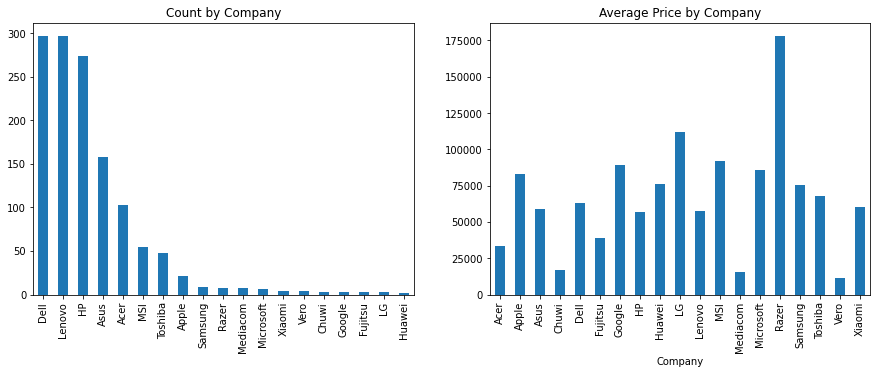

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
df['Company'].value_counts().plot(kind = 'bar', ax = ax[0])
df.groupby(by = 'Company')['Price'].mean().plot(kind = 'bar', ax = ax[1])
ax[0].title.set_text('Count by Company')
ax[1].title.set_text('Average Price by Company')
plt.show()

What is average price for each brand

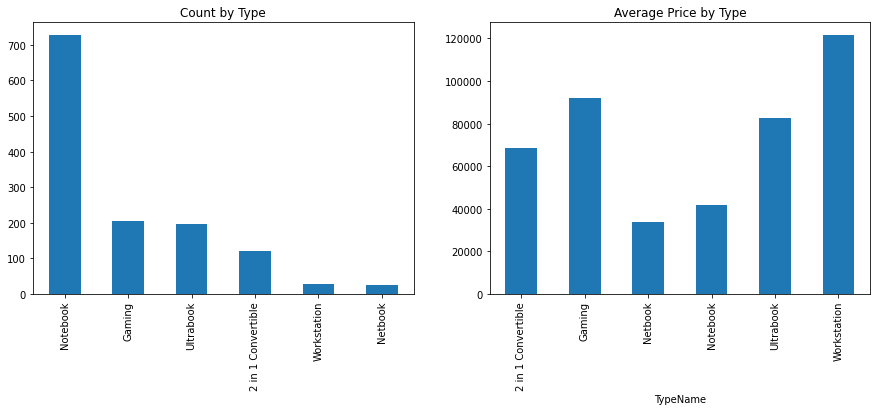

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
df['TypeName'].value_counts().plot(kind = 'bar', ax = ax[0])
df.groupby(by = 'TypeName')['Price'].mean().plot(kind = 'bar', ax = ax[1])
ax[0].title.set_text('Count by Type')
ax[1].title.set_text('Average Price by Type')

In [16]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Touchscreen, IPS panel, screen resolution are somethings that would affect the price, so we should extract this information separately

In [17]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda row : 1 if 'Touchscreen' in row else 0)

In [18]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


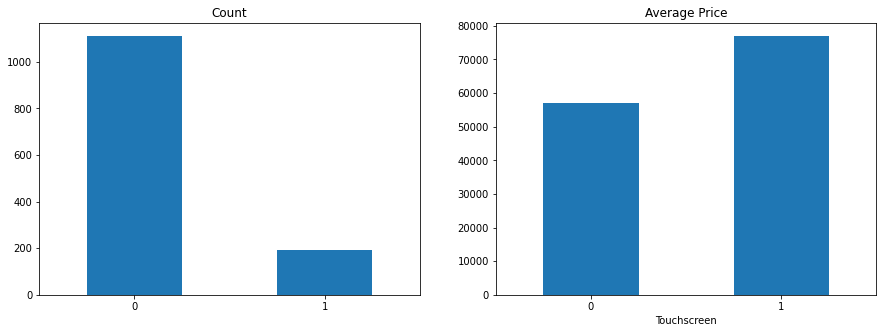

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
df['Touchscreen'].value_counts().plot(kind = 'bar', ax = ax[0])
df.groupby(by = 'Touchscreen')['Price'].mean().plot(kind = 'bar', ax = ax[1])
ax[0].title.set_text('Count')
ax[0].tick_params(axis='x', rotation = 0)
ax[1].title.set_text('Average Price')
ax[1].tick_params(axis='x', rotation = 0)

Laptops with touchscreen have higher prices than laptop without touchscreen

In [20]:
df['ips'] = df['ScreenResolution'].apply(lambda row : 1 if 'IPS' in row else 0)

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


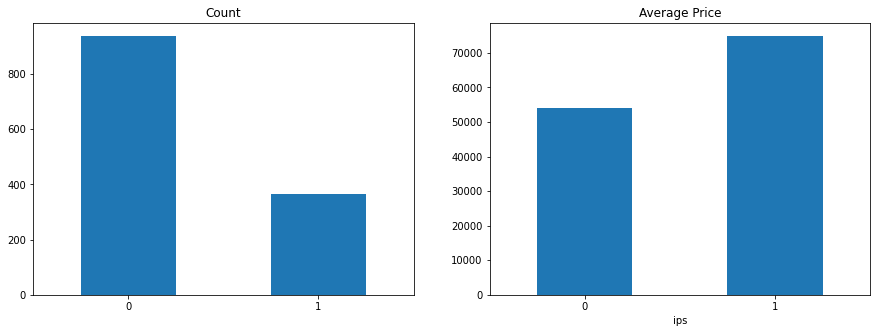

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
df['ips'].value_counts().plot(kind = 'bar', ax = ax[0])
df.groupby(by = 'ips')['Price'].mean().plot(kind = 'bar', ax = ax[1])
ax[0].title.set_text('Count')
ax[0].tick_params(axis='x', rotation = 0)
ax[1].title.set_text('Average Price')
ax[1].tick_params(axis='x', rotation = 0)

Laptops with IPS panel have higher prices than laptop without IPS panel

In [23]:
df['XRes'] = df['ScreenResolution'].apply(lambda row : row.split('x')[0])
df['YRes'] = df['ScreenResolution'].apply(lambda row : row.split('x')[1])

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,XRes,YRes
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [25]:
df['YRes'].value_counts()

1080    841
768     308
2160     43
1800     31
1440     31
900      27
1600     10
1504      6
1200      5
1824      1
Name: YRes, dtype: int64

In [26]:
df['XRes'] = df['XRes'].str.findall('\d+').apply(lambda row : row[-1])

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,XRes,YRes
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [28]:
df['XRes'] = df['XRes'].astype(int)
df['YRes'] = df['YRes'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  XRes              1303 non-null   int32  
 14  YRes              1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [30]:
df[df['Cpu'].str.contains('AMD')]['Cpu'].value_counts()

AMD A9-Series 9420 3GHz            11
AMD A6-Series 9220 2.5GHz           7
AMD A12-Series 9720P 3.6GHz         5
AMD A8-Series 7410 2.2GHz           4
AMD A9-Series 9410 2.9GHz           3
AMD Ryzen 1700 3GHz                 3
AMD A10-Series 9620P 2.5GHz         2
AMD A10-Series 9600P 2.4GHz         2
AMD A9-Series A9-9420 3GHz          2
AMD E-Series 7110 1.8GHz            2
AMD E-Series E2-9000e 1.5GHz        2
AMD A12-Series 9720P 2.7GHz         2
AMD A6-Series A6-9220 2.5GHz        2
AMD A10-Series A10-9620P 2.5GHz     2
AMD E-Series E2-6110 1.5GHz         1
AMD Ryzen 1600 3.2GHz               1
AMD E-Series 6110 1.5GHz            1
AMD E-Series 9000e 1.5GHz           1
AMD A6-Series 9220 2.9GHz           1
AMD E-Series E2-9000 2.2GHz         1
AMD A9-Series 9420 2.9GHz           1
AMD A6-Series 7310 2GHz             1
AMD A12-Series 9700P 2.5GHz         1
AMD A4-Series 7210 2.2GHz           1
AMD FX 8800P 2.1GHz                 1
AMD E-Series 9000 2.2GHz            1
AMD FX 9830P

In [31]:
df['ClockSpeed'] = df['Cpu'].str.findall('\d+\.*\d*GHz').apply(lambda row : row[0].split('GHz')[0]).astype(float)

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,XRes,YRes,ClockSpeed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,3.1


<AxesSubplot:xlabel='ClockSpeed', ylabel='Price'>

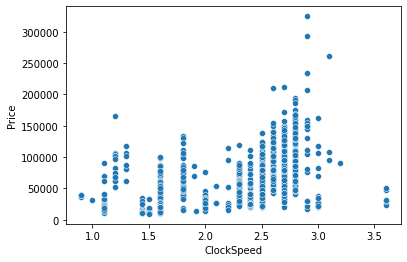

In [33]:
sns.scatterplot(data = df, x = 'ClockSpeed', y = 'Price')

In [34]:
df.corr()['Price']['ClockSpeed']

0.4302931019703112

In [35]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [36]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

In [37]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [38]:
new_df = df['Memory'].str.split('+', expand = True)

In [39]:
new_df.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [40]:
new_df[0] = new_df[0].apply(lambda row : '0' if row is None else row)
new_df[1] = new_df[1].apply(lambda row : '0' if row is None else row)

In [41]:
new_df['col1_ssd_mask'] = new_df[0].apply(lambda row : 1 if 'SSD' in row else 0)
new_df['col2_ssd_mask'] = new_df[1].apply(lambda row : 1 if 'SSD' in row else 0)

new_df['col1_hdd_mask'] = new_df[0].apply(lambda row : 1 if 'HDD' in row else 0)
new_df['col2_hdd_mask'] = new_df[1].apply(lambda row : 1 if 'HDD' in row else 0)

In [42]:
new_df[0] = new_df[0].str.findall('\d+')
new_df[0] = new_df[0].apply(lambda row : row[0])

new_df[1] = new_df[1].str.findall('\d+')
new_df[1] = new_df[1].apply(lambda row : row[0])

new_df[0] = new_df[0].astype(int)
new_df[1] = new_df[1].astype(int)

In [43]:
new_df[0].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: 0, dtype: int64

In [44]:
new_df[1].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: 1, dtype: int64

In [45]:
new_df ['SSD'] = (new_df[0] * new_df['col1_ssd_mask']) + (new_df[1] * new_df['col2_ssd_mask'])

In [46]:
new_df ['HDD'] = (new_df[0] * new_df['col1_hdd_mask']) + (new_df[1] * new_df['col2_hdd_mask'])

In [47]:
new_df.head()

,0,1,col1_ssd_mask,col2_ssd_mask,col1_hdd_mask,col2_hdd_mask,SSD,HDD
0,128,0,1,0,0,0,128,0
1,128,0,0,0,0,0,0,0
2,256,0,1,0,0,0,256,0
3,512,0,1,0,0,0,512,0
4,256,0,1,0,0,0,256,0


In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   0              1303 non-null   int32
 1   1              1303 non-null   int32
 2   col1_ssd_mask  1303 non-null   int64
 3   col2_ssd_mask  1303 non-null   int64
 4   col1_hdd_mask  1303 non-null   int64
 5   col2_hdd_mask  1303 non-null   int64
 6   SSD            1303 non-null   int64
 7   HDD            1303 non-null   int64
dtypes: int32(2), int64(6)
memory usage: 71.4 KB


In [49]:
df['SSD'] = new_df['SSD']
df['HDD'] = new_df['HDD']

In [50]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,XRes,YRes,ClockSpeed,SSD,HDD
589,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,94305.600,0,1,1920,1080,2.5,128,1000
1147,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.18,53807.472,0,0,1920,1080,2.7,256,0
527,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,2000 HDD,Nvidia GeForce 920MX,No OS,2.20,24455.520,0,0,1366,768,2.0,0,2000
186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512 SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,127712.160,1,0,3840,2160,2.8,512,0
1290,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24455.520,0,0,1366,768,2.4,0,1000


In [51]:
df['ppi'] = ((df['XRes'] ** 2 + df['YRes'] ** 2) ** 0.5) / df['Inches']

In [52]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,XRes,YRes,ClockSpeed,SSD,HDD,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,2.3,128,0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1.8,0,0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,2.5,256,0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,2.7,512,0,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,3.1,256,0,226.983005


In [53]:
df.drop(columns = ['Inches', 'ScreenResolution', 'Cpu', 'Memory', 'XRes', 'YRes'], inplace = True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ClockSpeed,SSD,HDD,ppi
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2.3,128,0,226.983005
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1.8,0,0,127.677940
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2.5,256,0,141.211998
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2.7,512,0,220.534624
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3.1,256,0,226.983005


In [54]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [55]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [56]:
df.groupby(by = ['Company', 'OpSys'])['OpSys'].count()

Company    OpSys       
Acer       Chrome OS        11
           Linux            16
           Windows 10       76
Apple      Mac OS X          8
           macOS            13
Asus       Chrome OS         3
           Linux            10
           No OS             4
           Windows 10      139
           Windows 10 S      2
Chuwi      Windows 10        3
Dell       Chrome OS         1
           Linux            36
           Windows 10      253
           Windows 7         7
Fujitsu    Windows 10        3
Google     Chrome OS         3
HP         Chrome OS         4
           No OS            12
           Windows 10      235
           Windows 7        23
Huawei     Windows 10        2
LG         Windows 10        3
Lenovo     Android           2
           Chrome OS         3
           No OS            47
           Windows 10      232
           Windows 7        13
MSI        Windows 10       54
Mediacom   Windows 10        7
Microsoft  Windows 10 S      6
Razer      Wind

I was thinking of dropping the OpSys feature, but let's keep it for now

In [57]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Let's just take the brand names from GPU

In [58]:
df['GpuBrand'] = df['Gpu'].apply(lambda row : row.split()[0])

In [59]:
df['GpuBrand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GpuBrand, dtype: int64

In [60]:
df = df[df['GpuBrand'] != 'ARM']

In [61]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ClockSpeed,SSD,HDD,ppi,GpuBrand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2.3,128,0,226.983005,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1.8,0,0,127.677940,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2.5,256,0,141.211998,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2.7,512,0,220.534624,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3.1,256,0,226.983005,Intel


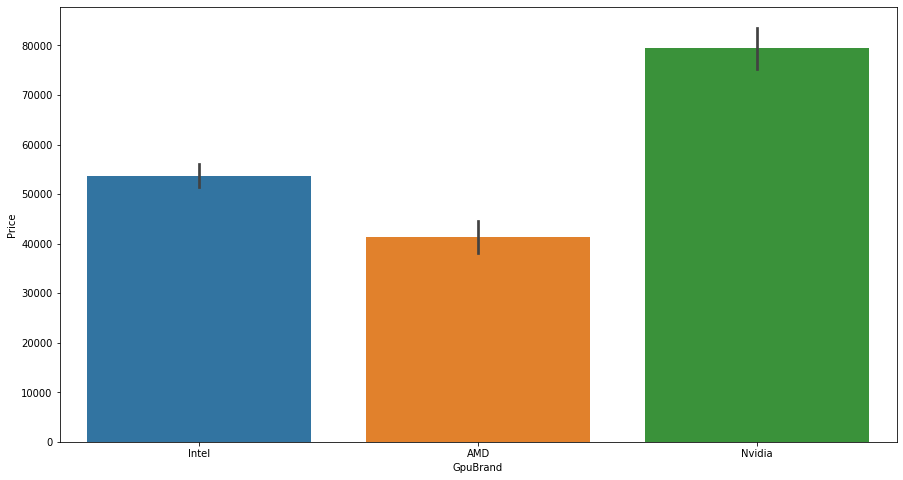

In [62]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df, x = 'GpuBrand', y = 'Price')
plt.show()

It looks like brand does have an impact on price

In [63]:
df.drop('Gpu', inplace = True, axis = 1)

In [64]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,ips,ClockSpeed,SSD,HDD,ppi,GpuBrand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,2.3,128,0,226.983005,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,1.8,0,0,127.677940,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,2.5,256,0,141.211998,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,2.7,512,0,220.534624,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,3.1,256,0,226.983005,Intel


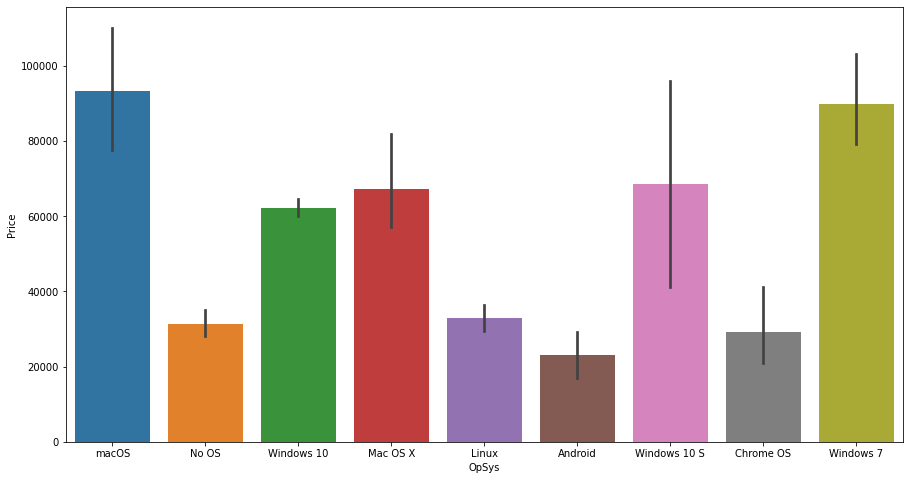

In [65]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df, x = 'OpSys', y = 'Price')
plt.show()

We will be making 3 categories Windows, Mac and Others

In [66]:
df['OS'] = df['OpSys'].apply(lambda row : 'Windows' if 'windows' in row.lower() else ('Mac' if 'mac' in row.lower() else 'Others'))

In [67]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,ips,ClockSpeed,SSD,HDD,ppi,GpuBrand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,2.3,128,0,226.983005,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,1.8,0,0,127.677940,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,2.5,256,0,141.211998,Intel,Others
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,2.7,512,0,220.534624,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,3.1,256,0,226.983005,Intel,Mac


In [68]:
df.drop('OpSys', inplace = True, axis = 1)

In [69]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ClockSpeed,SSD,HDD,ppi,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,2.3,128,0,226.983005,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,1.8,0,0,127.677940,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,2.5,256,0,141.211998,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,2.7,512,0,220.534624,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,3.1,256,0,226.983005,Intel,Mac


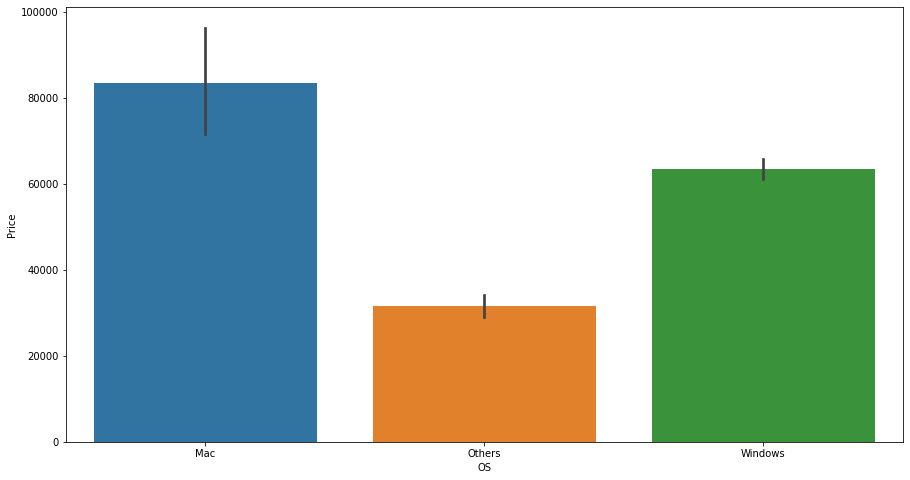

In [70]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df, x = 'OS', y = 'Price')
plt.show()

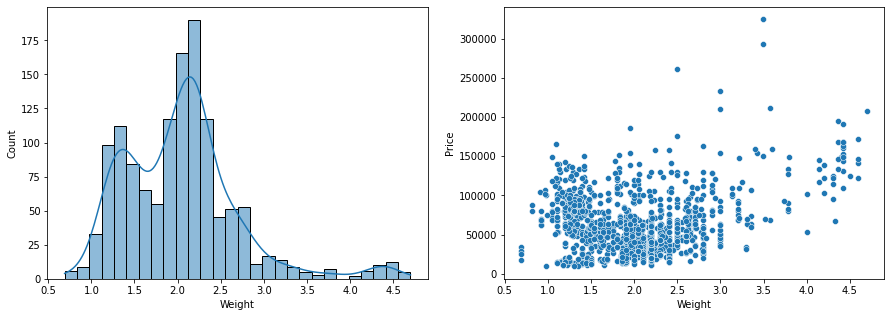

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.histplot(data = df, x = 'Weight', kde = True, ax = ax[0])
sns.scatterplot(data = df, x = 'Weight', y = 'Price', ax = ax[1])
plt.show()

There is a slight linear relationship between price and weight

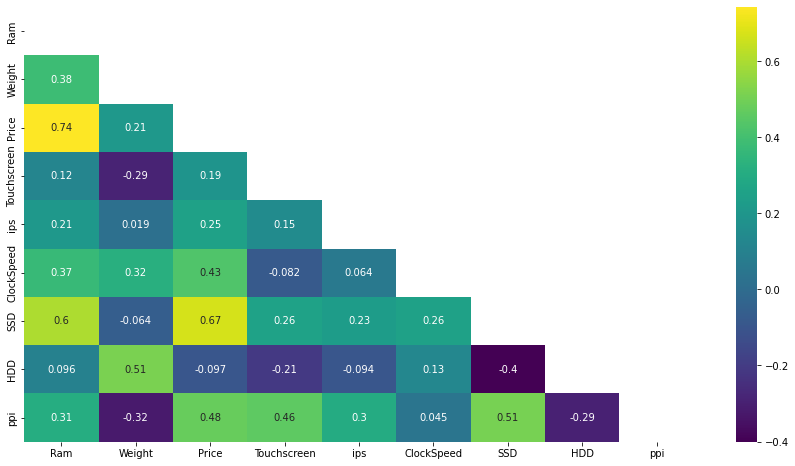

In [72]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), mask = np.triu(np.ones_like(df.corr())), annot = True, cmap = 'viridis')
plt.show()

In [73]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ClockSpeed,SSD,HDD,ppi,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,2.3,128,0,226.983005,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,1.8,0,0,127.677940,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,2.5,256,0,141.211998,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,2.7,512,0,220.534624,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,3.1,256,0,226.983005,Intel,Mac


In [74]:
X = df.drop(['Price'], axis = 1)
y = df['Price'].apply(lambda row : np.log(row))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

print("X Train shape : {}".format(X_train.shape))
print("y Train shape : {}".format(y_train.shape))
print("X Test shape : {}".format(X_test.shape))
print("y Test shape : {}".format(y_test.shape))

X Train shape : (1106, 12)
y Train shape : (1106,)
X Test shape : (196, 12)
y Test shape : (196,)


In [76]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

model = LinearRegression()

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('Column Transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 10, 11])])),
                ('Model', LinearRegression())])

In [77]:
y_pred = pipe.predict(X_test)

In [78]:
print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.772331411927455
MAE : 0.23652138541618134


## Model Selection

### Ridge Regression

In [79]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

model = Ridge(alpha = 10)

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.7807159482455216
MAE : 0.2323293737146782


### KNN

In [80]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

model = KNeighborsRegressor(n_neighbors = 10)

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.7606707538729574
MAE : 0.22787345519138655


### Decision Tree

In [81]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

model = DecisionTreeRegressor(max_depth = 8)

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.791282264443822
MAE : 0.2093222789939584


### Random Forest

In [82]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

model = RandomForestRegressor(n_estimators = 100,
                             random_state = 3,
                             max_samples = 0.5,
                             max_features = 0.75,
                             max_depth = 15)

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.8834868818596767
MAE : 0.16509791278755007


Huge jump in performance

### XGBoost

In [83]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

model = XGBRegressor(n_estimators = 45,
                             max_depth = 15)

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.9069944273197558
MAE : 0.14543802868747777


### Gradient Boosted Regressor

In [87]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

model = GradientBoostingRegressor(n_estimators = 500)

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.8856916653717786
MAE : 0.1616840932844552


### Voting Regressor

In [90]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

random_forest = RandomForestRegressor(n_estimators = 350,
                                      max_samples = 0.5,
                                      max_features = 0.75,
                                      max_depth = 15)

xgb = XGBRegressor(n_estimators = 25,
                   learning_rate = 0.3,
                   max_depth = 5)

gradient_boosted = GradientBoostingRegressor(n_estimators = 100,
                                            max_features = 0.5)


model = VotingRegressor([('random_forest', random_forest), ('xgb',xgb), ('gradient_boosted',gradient_boosted)],weights=[1,5,1])

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.8769782513451434
MAE : 0.16997164340566664


### Stacking

In [91]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

random_forest = RandomForestRegressor(n_estimators = 350,
                                      max_samples = 0.5,
                                      max_features = 0.75,
                                      max_depth = 15)

xgb = XGBRegressor(n_estimators = 25,
                   learning_rate = 0.3,
                   max_depth = 5)

gradient_boosted = GradientBoostingRegressor(n_estimators = 100,
                                            max_features = 0.5)


estimators = [('random_forest', random_forest), ('xgb',xgb), ('gradient_boosted',gradient_boosted)]

model = StackingRegressor(estimators = estimators, final_estimator = Ridge(alpha = 100))

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.8766773287249011
MAE : 0.17249860626699806


## Exporting the model

Since XGBoost performed the best we will be using that for the final model

In [99]:
col_transformer = ColumnTransformer(transformers = [
                    ('onehot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,10,11]) 
                    ], remainder = 'passthrough')

model = XGBRegressor(n_estimators = 45,
                             max_depth = 15)

pipe = Pipeline([
        ('Column Transformer', col_transformer),
        ('Model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score : {}".format(r2_score(y_test, y_pred)))
print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))

R2 Score : 0.8893749663841304
MAE : 0.1578104189997867


In [100]:
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [101]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ClockSpeed,SSD,HDD,ppi,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,2.3,128,0,226.983005,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,1.8,0,0,127.677940,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,2.5,256,0,141.211998,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,2.7,512,0,220.534624,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,3.1,256,0,226.983005,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,2.5,128,0,157.350512,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,2.5,512,0,276.053530,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,1.6,0,0,111.935204,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,2.5,0,1000,100.454670,AMD,Windows


In [103]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,ips,ClockSpeed,SSD,HDD,ppi,GpuBrand,OS
248,HP,Notebook,4,1.49,0,1,1.6,0,500,165.632118,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,1.1,0,500,100.454670,Intel,Others
1251,HP,Notebook,4,1.86,0,0,2.5,0,500,100.454670,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,2.3,0,1000,141.211998,Intel,Others
885,HP,2 in 1 Convertible,4,1.28,1,0,2.5,256,0,165.632118,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,2.3,128,1000,127.335675,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,2.9,0,500,100.454670,AMD,Others
322,Asus,Notebook,8,2.00,0,0,2.7,256,0,157.350512,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,2.7,256,0,165.632118,Intel,Windows
